## Define the Objective of the Analysis

Analisi del sentiment relativo al dibattito sullo _Smart Working_ in Italia e individuazione di eventuali 'influencer' sul tema.

## Collect Data

In [1]:
# imports
import numpy as np
import pandas as pd
import tweepy
tweepy.__version__

import re
import string
import itertools
from collections import Counter
from datetime import datetime
from numpy.core.multiarray import result_type
import time

In [5]:
from tqdm.notebook import tqdm
import json

In [2]:
# insert the keys here
consumer_key = 'VPzjkqKl2y1uSTJQvnVqS9e1X' 
consumer_secret = 'STG2IzVMf65vPGeOvBQyzdeoKBExAr5sIkhOaBeDe2fnIN14vY'
access_token = '1508409949835214853-HIyZJ3oT32TijKsdNDhGFZEEQTWwau'
access_token_secret = 'uLcs9hUYmLdocxkaSfXo69Gii46TISu5qZj5F6f6fBfnW'

#### Tweets Download

The next step is creating an OAuthHandler instance. We pass our consumer key and access token which we defined above.

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

Next, we pass the OAuthHandler instance into the API method.

In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True)

Tweets that contain a specific keyword

In [6]:
keywords = '("smartworking" OR "remotework" OR "lavoroagile" OR "hybridwork" OR "smart working" OR "remote work" OR "lavoro agile" OR "hybrid work")'

list_tweets = []

for tweet in tweepy.Cursor(api.search_tweets, q=keywords, count=100, lang='it').items(10000):
  print('entering')
  full_text = api.get_status(tweet.id, tweet_mode='extended')._json['full_text']
  print(tweet.id)
  list_tweets.append([tweet.created_at, tweet.id, full_text, tweet.favorite_count, tweet.retweet_count, tweet.user.screen_name,
                      tweet.user.location, tweet.retweeted, json.dumps(tweet.entities['user_mentions']), json.dumps(tweet.entities['hashtags'])])

# items is the maximum number of tweets to download.
# count is the number of tweets to return per page, up to a maximum of 100.

entering
1611094108889563141
entering
1611092122370727975
entering
1611088423930171392
entering
1611087802560569345
entering
1611082245514706944
entering
1611079894129074177
entering
1611077791411474433
entering
1611076871512526849
entering
1611075369309724673
entering
1611074047722266624
entering
1611072902606082049
entering
1611067721088921601
entering
1611064469718978560
entering
1611061405465120789
entering
1611058879831461891
entering
1611058728815427585
entering
1611055571297337344
entering
1611054096483553282
entering
1611053753133633536
entering
1611053536359636994
entering
1611052658135121921
entering
1611051597307514893
entering
1611041927935164423
entering
1611041704236154898
entering
1611041569112457222
entering
1611041384894431240
entering
1611040952818204690
entering
1611037329266966528
entering
1611036743121383426
entering
1611034841834983424
entering
1611033783121084420
entering
1611033680138440711
entering
1611032260869758977
entering
1611028733258874880
entering
16110

Rate limit reached. Sleeping for: 609


1609242263699202048
entering
1609239934816198663
entering
1609239235294363651
entering
1609238805474598920
entering
1609238567544291329
entering
1609238213738258433
entering
1609237242668539904
entering
1609237131377115143
entering
1609236299617300481
entering
1609235464245878791
entering
1609233941881360385
entering
1609233926870142977
entering
1609233671831146497
entering
1609233570706472960
entering
1609232492048924674
entering
1609232322703892483
entering
1609232276486750209
entering
1609231928393179138
entering
1609231407301234688
entering
1609226435432181762
entering
1609226157739630594
entering
1609226121895084037
entering
1609224155769212928
entering
1609220561531535364
entering
1609218457597263872
entering
1609218250633510913
entering
1609212103642214406
entering
1609209908976648196
entering
1609208741307551745
entering
1609203484133588993
entering
1609203346472148993
entering
1609203123834486787
entering
1609202725375414278
entering
1609198624671469570
entering
16091983302145

Rate limit reached. Sleeping for: 608


1608450121355739137
entering
1608449891835195392
entering
1608448504698998785
entering
1608443757774667778
entering
1608443728368390144
entering
1608443480476454918
entering
1608442651119947777
entering
1608441687139037184
entering
1608441561385259010
entering
1608441023423815680
entering
1608440718414020610
entering
1608440511164989440
entering
1608440388750311424
entering
1608439990685691904
entering
1608438776233357312
entering
1608438022038761472
entering
1608436212116918272
entering
1608436196878737410
entering
1608435833777840128
entering
1608434168492613634
entering
1608433820155654145
entering
1608432831436591110
entering
1608429602816376836
entering
1608429439226122241
entering
1608429205850849282
entering
1608428894121779202
entering
1608428350095388678
entering
1608427465227096065
entering
1608427144463482880
entering
1608427098267418625
entering
1608426805756674048
entering
1608425274932174849
entering
1608425048507052033
entering
1608423989818580994
entering
16084227049730

In [7]:
print(len(list_tweets))

2667


In [8]:
# Turn list_tweet into a DataFrame changing column names
tweets = pd.DataFrame(list_tweets, columns=['date','id','text','like','n_rt','author','location','retweeted','user_mentions','hastags'])
tweets.to_csv('../data/SW_final.csv')

In [9]:
# Read csv
#tweets = pd.read_csv('../data/SW_ex.csv')
#tweets_loaded = tweets_loaded.drop('Unnamed: 0', axis=1)
tweets.head()

,date,id,text,like,n_rt,author,location,retweeted,user_mentions,hastags
0,2023-01-05 20:15:42+00:00,1611094108889563141,@giorgeliot Sì infatti stavo giusto scrivendo ...,1,0,Stormtrooper528,Italia,False,"[{""screen_name"": ""giorgeliot"", ""name"": ""Silvia...",[]
1,2023-01-05 20:07:49+00:00,1611092122370727975,RT @mrmcphisto: la @lauraravetto dice che la m...,0,19,Alessan83492964,,False,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph...","[{""text"": ""smartworking"", ""indices"": [99, 112]..."
2,2023-01-05 19:53:07+00:00,1611088423930171392,RT @mrmcphisto: la @lauraravetto dice che la m...,0,19,SusannaPagani3,,False,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph...","[{""text"": ""smartworking"", ""indices"": [99, 112]..."
3,2023-01-05 19:50:39+00:00,1611087802560569345,RT @mrmcphisto: la @lauraravetto dice che la m...,0,19,DonatellaRento,,False,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph...","[{""text"": ""smartworking"", ""indices"": [99, 112]..."
4,2023-01-05 19:28:34+00:00,1611082245514706944,RT @mrmcphisto: la @lauraravetto dice che la m...,0,19,RobertaCannas2,,False,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph...","[{""text"": ""smartworking"", ""indices"": [99, 112]..."


In [10]:
print(tweets.shape)
print(tweets.columns)

(2667, 10)
Index(['date', 'id', 'text', 'like', 'n_rt', 'author', 'location', 'retweeted',
       'user_mentions', 'hastags'],
      dtype='object')


#### Data Pre-Processing

In [11]:
# Remove duplicates
tweets.drop_duplicates(subset ="id", inplace = True)
tweets.reset_index(drop = True, inplace = True)
tweets.shape

(2667, 10)

In [12]:
# Change date format
day = tweets['date'].dt.day
month = tweets['date'].dt.month
year = tweets['date'].dt.year

date = year.astype(str) + month.astype(str).str.zfill(2) + day.astype(str).str.zfill(2)
date = pd.to_datetime(date, format='%Y%m%d')
tweets.drop(columns = ['date'], inplace = True)
tweets['date'] = date

# Reorder columns
cols = tweets.columns.tolist()
cols = cols[-1:] + cols[:-1]
tweets = tweets[cols].copy()

print('Tweet per day:')
print()
print(tweets.groupby('date').count()['id'])

Tweet per day:

date
2022-12-26     59
2022-12-27    386
2022-12-28    331
2022-12-29    204
2022-12-30    562
2022-12-31    276
2023-01-01    147
2023-01-02    158
2023-01-03    169
2023-01-04    227
2023-01-05    148
Name: id, dtype: int64


Come possiamo osservare dalla distribuzione del numero di tweet nei giorni presi in considerazione, ...

In [13]:
# Create a DataFrame with the authors of the tweets and their respective frequency
freq_authors = tweets['author'].value_counts()
freq_authors.head()

mrmcphisto         44
infoitinterno      41
aleale2780         29
saragra98354743    23
lucague46760617    22
Name: author, dtype: int64

In [14]:
# Extract all hashtags from the full text
tweets['hashtags_list'] = tweets['text'].apply(lambda x: re.findall(r"#(\w+)", x))

# Extract all mentions from the full text
tweets['mentions'] = tweets['text'].apply(lambda x: re.findall(r"@(\w+)", x))

# \w matches any single letter, number or underscore (same as [a zA Z0 9_])

#### Data Cleaning

NLTK - Natural Language ToolKit is a platform for building Python programs to work with human language data. It provides easy to use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

In [15]:
import nltk
from nltk import FreqDist
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Text Pre-Processing

In [16]:
def preprocess_data(data):
    # remove numbers and turning words into lower case
    data = data.astype(str).str.replace('\d+','')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer = TweetTokenizer()
    
    # token lemmatization (ex. goes --> go)
    def lemmatize_text(text):
        return[(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
    
    # remove punctuation
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
    
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

In [17]:
# apply preprocess_data function
pre_tweets = preprocess_data(tweets['text'])
tweets['text_proc'] = pre_tweets

# delete italian stopwords
stop_words = set(stopwords.words('italian'))
tweets['text_proc'] = tweets['text_proc'].apply(lambda x: [item for item in x if item not in stop_words])

C:\Users\FC\AppData\Local\Temp\ipykernel_17020\3179111472.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+','')


## Analysis

### Social Content Analysis

#### _Sentiment Analysis_

FEEL-IT: Emotion and Sentiment Classification for the Italian Language.

https://towardsdatascience.com/sentiment-analysis-and-emotion-recognition-in-italian-using-bert-92f5c8fe8a2

In [18]:
from feel_it import EmotionClassifier, SentimentClassifier

sentiment_classifier = SentimentClassifier()
emotion_classifier = EmotionClassifier()

c:\Users\FC\miniconda3\envs\twitter\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The feel-it-italian-sentiment model performs sentiment analysis on Italian. We fine-tuned the UmBERTo model on our new dataset (i.e., FEEL-IT) obtaining state-of-the-art performances on different benchmark corpora.

In [ ]:
# print(sentiment_classifier.predict(tweets["text"].values.tolist()))

In [19]:
tweets_sentiment = tweets.copy()

In [20]:
text = tweets_sentiment['text']
li_sent = []
for i in range(0, text.shape[0]):
  sent = sentiment_classifier.predict([text[i]])
  li_sent.append(sent)

tweets_sentiment['sentiment_BERT'] = [item for sublist in li_sent for item in sublist]
     
positive = []
negative = []

In [21]:
tweets_sentiment.columns

Index(['date', 'id', 'text', 'like', 'n_rt', 'author', 'location', 'retweeted',
       'user_mentions', 'hastags', 'hashtags_list', 'mentions', 'text_proc',
       'sentiment_BERT'],
      dtype='object')

In [22]:
positive = []
negative = []
ratio = []

for line in tweets_sentiment.values:
  sent = line[13]

  if sent == 'negative':
    positive.append(0)
    negative.append(1)
    ratio.append(-1)
  else:
    positive.append(1)
    negative.append(0)
    ratio.append(1)

In [23]:
tweets_sentiment['positive'] = positive
tweets_sentiment['negative'] = negative
tweets_sentiment['ratio'] = ratio

In [24]:
tweets_sentiment.to_csv('../data/SW_sentiment_final.csv')

#### _Emotion Analysis_

Recognizing emotions in text is fundamental to get a better sense of how people are talking about something. People can talk about a new event, but positive/negative labels might not be enough.

The feel-it-italian-emotion model performs emotion classification (joy, fear, anger, sadness) on Italian. We fine-tuned the UmBERTo model on our new dataset (i.e., FEEL-IT) obtaining state-of-the-art performances on different benchmark corpora.

In [25]:
tweets_emotion = tweets.copy()

In [26]:
text = tweets_emotion['text']
li_emotion = []
for i in range(0, text.shape[0]):
  emotion = emotion_classifier.predict([text[i]])
  li_emotion.append(emotion)

tweets_emotion['emotion_BERT'] = [item for sublist in li_emotion for item in sublist]
     
anger = []
joy = []
fear = []
sadness = []

In [27]:
anger = []
joy = []
fear = []
sadness = []

for line in tweets_emotion.values:
  emotion = line[13]

  if emotion == 'anger':
    anger.append(1)
    joy.append(0)
    fear.append(0)
    sadness.append(0)
  elif emotion == 'joy':
    anger.append(0)
    joy.append(1)
    fear.append(0)
    sadness.append(0)
  elif emotion == 'fear':
    anger.append(0)
    joy.append(0)
    fear.append(1)
    sadness.append(0)
  else:
    anger.append(0)
    joy.append(0)
    fear.append(0)
    sadness.append(1)

In [28]:
tweets_emotion['anger'] = anger
tweets_emotion['joy'] = joy
tweets_emotion['fear'] = fear
tweets_emotion['sadness'] = sadness

In [29]:
tweets_emotion.to_csv('../data/SW_emotion_final.csv')

---

#### Social Network Analysis

In [30]:
author_mentions = tweets[['author', 'user_mentions']]
author_mentions.head()

,author,user_mentions
0,Stormtrooper528,"[{""screen_name"": ""giorgeliot"", ""name"": ""Silvia..."
1,Alessan83492964,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph..."
2,SusannaPagani3,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph..."
3,DonatellaRento,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph..."
4,RobertaCannas2,"[{""screen_name"": ""mrmcphisto"", ""name"": ""mrmcph..."


Stormtrooper528
Alessan83492964
SusannaPagani3
DonatellaRento
RobertaCannas2
GiaPettinelli
iphoneapple6S
natalia_gheza
Ernesto23710724
swamilee
paolaca81058036
aliceperon
Francy_741
martin_marzia
MargaretBaggi
ROSALBABRAMBIL4
jack_ryan65
Gabriel26548923
FortunatoBille
vecchio_rosanna
ilsecoloxix
Algondio03
rome_sea
banter_peter
rome_sea
MaresiLuca
rome_sea
k_zoldik
rome_sea
rome_sea
Ricercamy
rome_sea
Gustav45114190
az_amerikanto
aleale2780
giabar_72
Laura_Bennati
MMedifocus
TheCarrese
MeriRoschi
BarbaraPartisa1
alessiobar4
Ljuba2000
mrmcphisto
Arcticnian
mrmcphisto
mrmcphisto
ciofypanda
mrmcphisto
AnsaLiguria
C64Peter
ansa_liguria
Bandini83
LazzariniMia
pocket_tra
reysfilip
elivito
caafcgil_ER
senzafili2
MarioRo44807438
zerbo_antonella
Luca67Salmaso
IT_lex
Vera52834961
ViselliTania
Bordnassela
Al___Zheimer
24NormeTributi
redpastel3
TA26825426
holly_ciao2
MariaCr68567895
njallslife
mynameispaolo2
Bordnassela
giannibuonsant2
George32027
GMarcuccio
Giorgio_JD78
luigi_daniele
guidotweet
l

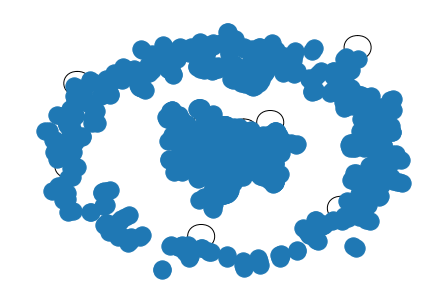

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

Graph = nx.Graph()

for index, row in author_mentions.iterrows():
  print(row[0])
  mentions_array = json.loads(row[1])
  for item in mentions_array:
    Graph.add_edge(row[0], item['screen_name'])
nx.draw(Graph, pos=nx.spring_layout(Graph))

In [32]:
nodes_degree_df = pd.DataFrame(nx.degree(Graph))
nodes_degree_df.sort_values(1, ascending=False).head(20)
nodes_degree = [row for index, row in nodes_degree_df.iterrows() if row[1] > 2]

#### _Measures of Centrality_

Nodes with Highest Degree

In [33]:
nodes_degree_df.sort_values(1, ascending=False).head(15)

,0,1
890,BonomiAllegra,210
3,mrmcphisto,145
59,GiorgiaMeloni,141
377,AlbertoBagnai,118
60,ClaudioDurigon,82
284,PaoloZangrillo,75
13,bioccolo,68
629,mvetto,64
200,LucillaMasini,64
44,aleale2780,58


Average Degree

In [34]:
degree_data = nodes_degree_df[1].values
average_degree = np.average(degree_data)
print(f'The average degree of the graph is: {average_degree}')

The average degree of the graph is: 2.821978021978022


Siccome il grado medio è maggiore di 1, molto probabilmente è sorta una giant component

Calcolo Assortativity

In [36]:
assortativity = nx.degree_pearson_correlation_coefficient(Graph)
print(f'The assortativity coefficient is: {assortativity}')

The assortativity coefficient is: -0.24426525704675417


Stranamente, nonostante la rete presa in esame sia una rete sociale, il coefficiente di assortativity è minore di 0, anche se di poco, quindi la rete è di tipo disassortative

In [37]:
len(nodes_degree)
nodes_degree[0]

0    Alessan83492964
1                  4
Name: 2, dtype: object

#### _Community Detection_

In [38]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Plasma256
from bokeh.transform import linear_cmap

from networkx.algorithms import community as networkxCommunity

In [39]:
from bokeh.io import output_notebook, show, save

In [40]:
output_notebook()

Loading BokehJS ...

In [41]:
communities = networkxCommunity.greedy_modularity_communities(Graph)

In [42]:
modularity_class = {}
modularity_color = {}

for community_number, community in enumerate(communities):
    for name in community:
        
        modularity_class[name] = community_number
        modularity_color[name] = Plasma256[community_number]

In [43]:
nx.set_node_attributes(Graph, modularity_class, 'modularity_class')
nx.set_node_attributes(Graph, modularity_color, 'modularity_color')
nx.set_node_attributes(Graph, modularity_class, 'group')

In [44]:
from collections import Counter
Counter(modularity_class).most_common()
comm_list = [modularity_class[x] for x in modularity_class]

count_dict = {}

for item in comm_list:
  if str(item) not in count_dict:
    count_dict[str(item)] = 1
  else:
    count_dict[str(item)] += 1

In [45]:
count_dict

{'0': 234,
 '1': 210,
 '2': 179,
 '3': 139,
 '4': 87,
 '5': 73,
 '6': 63,
 '7': 43,
 '8': 37,
 '9': 34,
 '10': 32,
 '11': 29,
 '12': 23,
 '13': 20,
 '14': 19,
 '15': 16,
 '16': 15,
 '17': 13,
 '18': 13,
 '19': 12,
 '20': 10,
 '21': 10,
 '22': 10,
 '23': 10,
 '24': 9,
 '25': 9,
 '26': 9,
 '27': 9,
 '28': 9,
 '29': 9,
 '30': 8,
 '31': 8,
 '32': 7,
 '33': 7,
 '34': 6,
 '35': 6,
 '36': 6,
 '37': 5,
 '38': 5,
 '39': 5,
 '40': 5,
 '41': 5,
 '42': 5,
 '43': 5,
 '44': 5,
 '45': 4,
 '46': 4,
 '47': 4,
 '48': 4,
 '49': 4,
 '50': 4,
 '51': 4,
 '52': 3,
 '53': 3,
 '54': 3,
 '55': 3,
 '56': 3,
 '57': 3,
 '58': 3,
 '59': 3,
 '60': 3,
 '61': 3,
 '62': 3,
 '63': 3,
 '64': 3,
 '65': 3,
 '66': 3,
 '67': 3,
 '68': 3,
 '69': 3,
 '70': 3,
 '71': 3,
 '72': 3,
 '73': 3,
 '74': 3,
 '75': 3,
 '76': 3,
 '77': 3,
 '78': 3,
 '79': 3,
 '80': 3,
 '81': 3,
 '82': 3,
 '83': 2,
 '84': 2,
 '85': 2,
 '86': 2,
 '87': 2,
 '88': 2,
 '89': 2,
 '90': 2,
 '91': 2,
 '92': 2,
 '93': 2,
 '94': 2,
 '95': 2,
 '96': 2,
 '97': 2,
 '

In [46]:
print(len(comm_list))

1820


In [47]:
modularity_class

{'LisaTorna': 0,
 'yi__benevolence': 0,
 'Napalm51': 0,
 'IndomitusVirtus': 0,
 'SolariPaolo': 0,
 'publio71': 0,
 'VendutoCorrotto': 0,
 'SpinelliIvano': 0,
 'FabrizioPerfumo': 0,
 'MinutemanItaly': 0,
 'mirymir332009': 0,
 'SbrizzaClaudio': 0,
 'VincenzoLIBRAN1': 0,
 'pbrex668': 0,
 'EnricoBuono': 0,
 'bfogli1': 0,
 'Sakurauchi_Hime': 0,
 'CastigamattU': 0,
 'Foy84': 0,
 'ElisaconlaL': 0,
 'Sara96718287': 0,
 'Luca67': 0,
 'Testament73': 0,
 'gidocg': 0,
 'Andrea03094809': 0,
 'mia76587271': 0,
 'MurielMuriella': 0,
 'adolar41744618': 0,
 'RediStefano': 0,
 'Ale_____B': 0,
 'cinziotta73': 0,
 'monicaintre': 0,
 'RiefoliSal': 0,
 'live_dom': 0,
 'LucaS36784560': 0,
 'f43bb0d6a395428': 0,
 'LaSordaefelice': 0,
 'GuidoDallorso': 0,
 'diego_curletto': 0,
 'filippocecchin2': 0,
 'andreoneth': 0,
 'PradoPa3': 0,
 'RebelEkonomist': 0,
 'is_clapton': 0,
 'a_meluzzi': 0,
 'eleonor72462980': 0,
 'OMPM20': 0,
 'JabbaTm2': 0,
 'ilarysotgiu1': 0,
 'LucaViaggio': 0,
 'seanmcmurphy': 0,
 'MauroReg1

In [48]:
from pyvis.network import Network

nt = Network('700px', '1420px',notebook=True, cdn_resources='remote')
nt.from_nx(Graph)
nt.show('./nx.html')

## Visualization